# Multiclass Vulnerable Dataset

The file is text format. Therefore, split the dataset and create csv for easy use.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("MVD/label2CWE.txt",'r') as file:
    CWE_IDs = [line.strip() for line in file]

In [3]:
cwe_dict = {}
for cwe in CWE_IDs:
    i = cwe.index(':')
    key = cwe[:i]
    value = cwe[i+2:]
    cwe_dict[key] = value
    print(cwe, " ==> ",key, value)

0: non-vulnerable  ==>  0 non-vulnerable
1: CWE-404  ==>  1 CWE-404
2: CWE-476  ==>  2 CWE-476
3: CWE-119  ==>  3 CWE-119
4: CWE-706  ==>  4 CWE-706
5: CWE-670  ==>  5 CWE-670
6: CWE-673  ==>  6 CWE-673
7: CWE-119, CWE-666, CWE-573  ==>  7 CWE-119, CWE-666, CWE-573
8: CWE-573  ==>  8 CWE-573
9: CWE-668  ==>  9 CWE-668
10: CWE-400, CWE-665, CWE-020  ==>  10 CWE-400, CWE-665, CWE-020
11: CWE-662  ==>  11 CWE-662
12: CWE-400  ==>  12 CWE-400
13: CWE-665  ==>  13 CWE-665
14: CWE-020  ==>  14 CWE-020
15: CWE-074  ==>  15 CWE-074
16: CWE-362  ==>  16 CWE-362
17: CWE-191  ==>  17 CWE-191
18: CWE-190  ==>  18 CWE-190
19: CWE-610  ==>  19 CWE-610
20: CWE-704  ==>  20 CWE-704
21: CWE-170  ==>  21 CWE-170
22: CWE-676  ==>  22 CWE-676
23: CWE-187  ==>  23 CWE-187
24: CWE-138  ==>  24 CWE-138
25: CWE-369  ==>  25 CWE-369
26: CWE-662, CWE-573  ==>  26 CWE-662, CWE-573
27: CWE-834  ==>  27 CWE-834
28: CWE-400, CWE-665  ==>  28 CWE-400, CWE-665
29: CWE-400, CWE-404  ==>  29 CWE-400, CWE-404
30: CWE-22

In [4]:
delimiter = "------------------------------"       

with open("MVD/mvd.txt",'r') as file:
    lines = [line.strip() for line in file]
lines[:10]

['1 150200/dirent_uri.c memset 405',
 'const char *svn_relpath__internal_style(const char *relpath,apr_pool_t *pool) 861',
 'return svn_relpath_canonicalize ( internal_style ( relpath , pool ) , pool ) ; 863',
 'const char *svn_relpath_canonicalize(const char *relpath,apr_pool_t *pool) 1411',
 'return canonicalize ( type_relpath , relpath , pool ) ; 1413',
 'static const char *canonicalize(path_type_t type,const char *path,apr_pool_t *pool) 389',
 'char * canon ; 391',
 'char * dst ; 392',
 "if ( path [ 0 ] == '\\0' )  401",
 'dst = canon = ( memset ( apr_palloc ( pool , strlen ( path ) + 1 ) , 0 , strlen ( path ) + 1 ) ); 405']

In [5]:
# listing the location index of the delimiter
del_indices = [i for i, x in enumerate(lines) if x == delimiter]
del_indices[:5]

[104, 120, 166, 422, 451]

In [6]:
# listing the location index of the data index and its info
heads_indices = [0]+list(map(lambda x:x+1, del_indices[:-1]))
head_list = [lines[i][1:] for i in heads_indices]

In [7]:
cwe_dict

{'0': 'non-vulnerable',
 '1': 'CWE-404',
 '2': 'CWE-476',
 '3': 'CWE-119',
 '4': 'CWE-706',
 '5': 'CWE-670',
 '6': 'CWE-673',
 '7': 'CWE-119, CWE-666, CWE-573',
 '8': 'CWE-573',
 '9': 'CWE-668',
 '10': 'CWE-400, CWE-665, CWE-020',
 '11': 'CWE-662',
 '12': 'CWE-400',
 '13': 'CWE-665',
 '14': 'CWE-020',
 '15': 'CWE-074',
 '16': 'CWE-362',
 '17': 'CWE-191',
 '18': 'CWE-190',
 '19': 'CWE-610',
 '20': 'CWE-704',
 '21': 'CWE-170',
 '22': 'CWE-676',
 '23': 'CWE-187',
 '24': 'CWE-138',
 '25': 'CWE-369',
 '26': 'CWE-662, CWE-573',
 '27': 'CWE-834',
 '28': 'CWE-400, CWE-665',
 '29': 'CWE-400, CWE-404',
 '30': 'CWE-221',
 '31': 'CWE-754',
 '32': 'CWE-311',
 '33': 'CWE-404, CWE-668',
 '34': 'CWE-506',
 '35': 'CWE-758',
 '36': 'CWE-666',
 '37': 'CWE-467',
 '38': 'CWE-327',
 '39': 'CWE-666, CWE-573',
 '40': 'CWE-469'}

In [8]:
# listing the location index of CWE ids
cwes_indices = list(map(lambda x:x-1, del_indices))
cwes_list = [lines[i] for i in cwes_indices]
cwes_names = [cwe_dict[i] for i in cwes_list]
cwes_names[:5]

['non-vulnerable',
 'non-vulnerable',
 'non-vulnerable',
 'non-vulnerable',
 'CWE-311']

In [9]:
vul_list = [0 if int(cwe)==0 else 1 for cwe in cwes_list]
vul_list[:5], cwes_list[:5]

([0, 0, 0, 0, 1], ['0', '0', '0', '0', '32'])

In [10]:
len(del_indices) == len(heads_indices) == len(cwes_indices)

True

In [11]:
codes_list = []
for i in range(len(del_indices)):
    start = heads_indices[i]+1
    end = cwes_indices[i]
    codes = lines[start:end]
    codes = '\n'.join(codes)
    codes_list.append(codes)

In [12]:
data = {'info':head_list, 'CWE ID':cwes_names, 'mvd_label':cwes_list, 'code':codes_list, 'vul':vul_list}
df = pd.DataFrame(data=data)
print(df.columns.values)
df.head(10)

['info' 'CWE ID' 'mvd_label' 'code' 'vul']


,info,CWE ID,mvd_label,code,vul
0,150200/dirent_uri.c memset 405,non-vulnerable,0,const char *svn_relpath__internal_style(const ...,0
1,79848/CWE134_Uncontrolled_Format_String__char...,non-vulnerable,0,static void goodG2B() 64\nchar * data ; 66\nch...,0
2,94203/CWE319_Cleartext_Tx_Sensitive_Info__w32...,non-vulnerable,0,static void goodB2G2() 289\nwchar_t * password...,0
3,151133/utils.c strcmp 737,non-vulnerable,0,"int avformat_open_input(AVFormatContext **ps,c...",0
4,94266/CWE319_Cleartext_Tx_Sensitive_Info__w32...,CWE-311,32,void CWE319_Cleartext_Tx_Sensitive_Info__w32_w...,1
5,72889/CWE122_Heap_Based_Buffer_Overflow__c_de...,non-vulnerable,0,static void goodG2B() 56\nvector < char * > da...,0
6,78327/CWE127_Buffer_Underread__new_char_memcp...,non-vulnerable,0,static void goodG2B2() 93\nchar * data ; 95\nd...,0
7,95615/CWE36_Absolute_Path_Traversal__char_con...,non-vulnerable,0,void bad() 55\nchar * data ; 57\nchar dataBuff...,0
8,80601/CWE134_Uncontrolled_Format_String__wcha...,non-vulnerable,0,static void goodB2G() 136\nwchar_t * data ; 13...,0
9,0 153579/dfa.c xmalloc 2585,non-vulnerable,0,"void dfacomp(const char *s,size_t len,struct d...",0


### Count in Vulnerability classes 

In [13]:
df.value_counts(subset='vul')

vul
0    138522
1     43119
dtype: int64

### Count in CWE ID classes

CWE ID
non-vulnerable               138522
CWE-119                       18558
CWE-704                        5251
CWE-074                        4021
CWE-706                        3550
CWE-400, CWE-665, CWE-020      1904
CWE-476                        1701
CWE-404                        1463
CWE-400                         916
CWE-020                         799
CWE-311                         618
CWE-666                         424
CWE-506                         421
CWE-400, CWE-404                416
CWE-190                         326
CWE-369                         289
CWE-668                         287
CWE-191                         261
CWE-362                         211
CWE-670                         195
CWE-662                         188
CWE-758                         185
CWE-404, CWE-668                179
CWE-573                         142
CWE-666, CWE-573                 96
CWE-754                          90
CWE-400, CWE-665                 88
CWE-187              

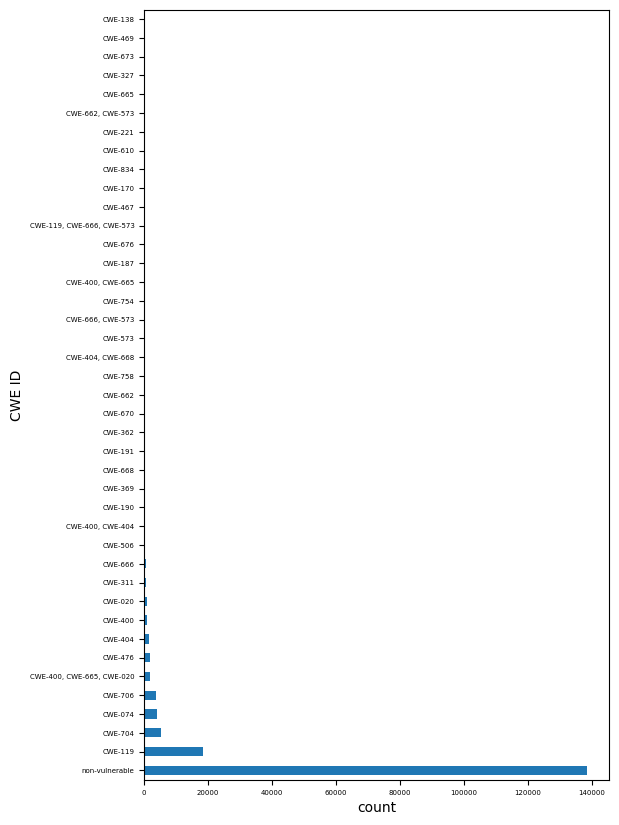

In [16]:
print(df.value_counts(subset='CWE ID'))
plt.figure(figsize=(6, 10))
df.value_counts(subset='CWE ID').plot.barh(xlabel='count', ylabel='CWE ID',fontsize=5)
plt.show()

In [ ]:
# Check if CWE ID == NaN & vul == 1 : vulnerable but no CWE info
no_cwe_vul = df[(df['CWE ID']=='non-vulnerable') & (df['vul'] == 1)]
print(no_cwe_vul.count())
no_cwe_vul.head(3)

In [ ]:
# Save it to csv file
df.to_csv("preprocessed datasets/MVD.csv")